In [49]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
mars_map = np.load('mars_map.npy')
nr, nc = mars_map.shape


In [73]:
mars_map

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [51]:
print(nr, nc)

1815 756


/tmp/ipykernel_8886/3300437665.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


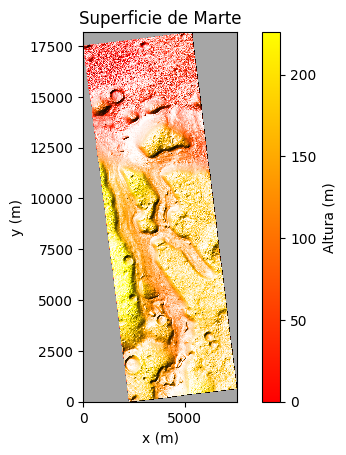

In [52]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()


In [53]:
def cyr(matriz,x,y,scale):
    nr,nc=matriz.shape
    r=nr-round(y/scale)
    c=round(x/scale)
    return r,c


In [ ]:
r,c=cyr(mars_map, 2500, 5000, scale)
print(mars_map[r-1,c-1])
print(r,c)

186.69428222656262
1316 250


In [37]:
def diferencia_altura(matriz,nodo1,nodo2):
    r1,c1=nodo1
    ra1,ca1=cyr(matriz,c1,r1,scale)
    r2,c2=nodo2
    ra2,ca2=cyr(matriz,c2,r2,scale)
    altura1=matriz[ra1-1,ca1-1]
    altura2=matriz[ra2-1,ca2-1]
    if altura1==-1 or altura2==-1:
        return False 
    distancia=np.abs(altura1-altura2)
    if distancia<0.25:
        return True
    else:
        return False
    

In [74]:

def diferencia_altura(matriz, nodo1, nodo2):
    r1, c1 = nodo1
    ra1, ca1 = cyr(matriz, c1, r1, scale)
    r2, c2 = nodo2
    ra2, ca2 = cyr(matriz, c2, r2, scale)
    
    # Add bounds checking
    if not (0 <= ra1-1 < matriz.shape[0] and 0 <= ca1-1 < matriz.shape[1] and 
            0 <= ra2-1 < matriz.shape[0] and 0 <= ca2-1 < matriz.shape[1]):
        return False
        
    altura1 = matriz[ra1-1, ca1-1]
    altura2 = matriz[ra2-1, ca2-1]
    
    if altura1 == -1 or altura2 == -1:
        return False
        
    distancia = np.abs(altura1 - altura2)
    return distancia < 0.1

In [63]:
nodo1=(5001,5001)
nodo2=(5000,5000)
print(diferencia_altura(mars_map,nodo1,nodo2))

True


In [64]:
def obtener_vecinos(matriz, nodo):
    vecinos = []
    acciones = [(-1, 0), (1, 0), (0, -1), (0, 1),(1,1),(-1,1),(1,-1),(-1,-1)]  # Arriba, abajo, izquierda, derecha,derecha arriba,izquierda arriba, derecha abajo, izquieda abajo
    r, c = matriz.shape
    x, y = nodo
    for dx, dy in acciones:
        nx, ny = x + dx, y + dy
        if  diferencia_altura(matriz,nodo,(nx,ny)):  
            vecinos.append((nx, ny))
    return vecinos

In [48]:
nodo1=(5000,5000)
print(obtener_vecinos(mars_map,nodo1))

[(4999, 5000), (5001, 5000), (5000, 4999), (5000, 5001), (5001, 5001), (4999, 5001), (5001, 4999), (4999, 4999)]


In [ ]:
def bfs(matriz, origen, objetivo):
    explorados = [origen]
    frontera = [origen]
    padres = {origen: None}  

    while frontera:
        inicio = frontera.pop(0)
        if inicio == objetivo:
            break
        for vecino in obtener_vecinos(matriz, inicio):
            if vecino not in explorados:
                explorados.append(vecino)
                frontera.append(vecino)
                padres[vecino] = inicio  
    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres[paso]
    camino.reverse() 

    return camino

In [ ]:
def bfs(matriz, origen, objetivo):
    if origen == objetivo:
        return [origen]
        
    explorados = [origen]
    frontera = [origen]
    padres = {origen: None}
    
    objetivo_encontrado = False
    
    while frontera and not objetivo_encontrado:
        inicio = frontera.pop(0)
        
        if inicio == objetivo:
            objetivo_encontrado = True
            break
            
        for vecino in obtener_vecinos(matriz, inicio):
            if vecino not in explorados:
                explorados.append(vecino)
                frontera.append(vecino)
                padres[vecino] = inicio
    
    # Check if the destination was reached
    if objetivo not in padres:
        return None  # No path found
        
    # Reconstruct the path
    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres[paso]
    camino.reverse()
    
    return camino

In [ ]:
origen=(2850,6400)
destino=(2900,6400)
camino=bfs(mars_map,origen,destino)
print(camino)
print(len(camino))

KeyError: (3150, 6800)